<a href="https://colab.research.google.com/github/jhlee508/2020-SKKU-Algorithm-Project/blob/master/%EC%9B%94%EA%B0%84%20%EB%8D%B0%EC%9D%B4%EC%BD%98%2011/Dacon11_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# working directory 바꾸기
import os
os.chdir('/content/drive/MyDrive/dacon_11')

In [ ]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from time import time
import datetime
import gc

In [ ]:
train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

# Train

가속도 : 물체의 가속도에 대한 값, 물체의 이동에 관한것

자이로스콥 : 물체의 각속도에 대한 값, 물체의 회전에 관한것

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875000 entries, 0 to 1874999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   time    int64  
 2   acc_x   float64
 3   acc_y   float64
 4   acc_z   float64
 5   gy_x    float64
 6   gy_y    float64
 7   gy_z    float64
dtypes: float64(6), int64(2)
memory usage: 114.4 MB


In [ ]:
train.describe()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
count,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06
mean,1.562000e+03,2.995000e+02,-4.489683e-01,-1.617913e-01,5.571471e-02,-1.307982e+00,-4.337745e-01,8.864100e-01
std,9.021100e+02,1.732049e+02,7.173082e-01,5.872018e-01,4.724824e-01,6.083228e+01,7.329832e+01,7.063345e+01
min,0.000000e+00,0.000000e+00,-8.838427e+00,-9.299714e+00,-8.316425e+00,-1.811127e+03,-1.594256e+03,-1.346143e+03
25%,7.810000e+02,1.497500e+02,-9.625643e-01,-5.163020e-01,-2.123550e-01,-2.048984e+01,-1.865320e+01,-1.546226e+01
50%,1.562000e+03,2.995000e+02,-6.560482e-01,-2.033985e-01,3.031258e-02,-1.421819e+00,-2.642753e-01,-1.798643e-01
75%,2.343000e+03,4.492500e+02,-1.701162e-04,1.406493e-01,3.581982e-01,1.572245e+01,1.676328e+01,1.641878e+01
max,3.124000e+03,5.990000e+02,8.426799e+00,8.484622e+00,6.432668e+00,1.870256e+03,2.111657e+03,1.255849e+03


In [ ]:
train['id'].value_counts().sort_index()

0       600
1       600
2       600
3       600
4       600
       ... 
3120    600
3121    600
3122    600
3123    600
3124    600
Name: id, Length: 3125, dtype: int64

In [ ]:
train['id'].nunique()

3125

In [ ]:
train['time'].nunique()

600

# train_labels



In [ ]:
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [ ]:
train_labels['label'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
train_labels['label_desc'].unique().size

61

In [ ]:
train_labels.describe()

,id,label
count,3125.000000,3125.000000
mean,1562.000000,27.926720
std,902.254122,12.887405
min,0.000000,0.000000
25%,781.000000,26.000000
50%,1562.000000,26.000000
75%,2343.000000,30.000000
max,3124.000000,60.000000


# test
train과 같은 똑같은 형식 -> 총 782개

In [ ]:
test['id'].nunique()

782

In [ ]:
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### id 가 0번인 데이터(숄더 프레스)
반복적인 동작인 만큼 주기가 있음.

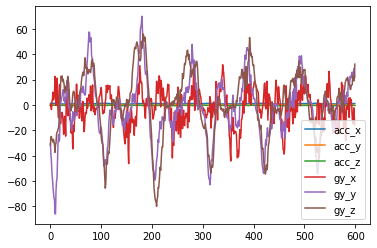

In [ ]:
# id 별 동작들의 흐름 살펴보기
ex=train[train['id']==0]
ex.iloc[:,2:].plot()
plt.show()

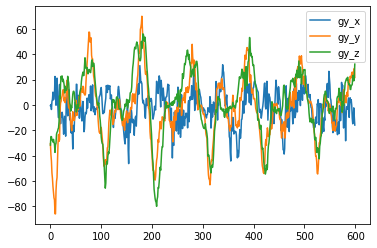

In [ ]:
ex.iloc[:,5:].plot()
plt.show()

###id가 1번인 데이터(운동아님)
그래프 상으로는 특정 주기가 안생김.

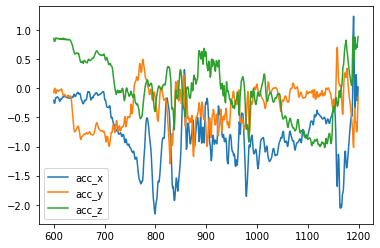

In [ ]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==1]
ex.iloc[:,2:5].plot()

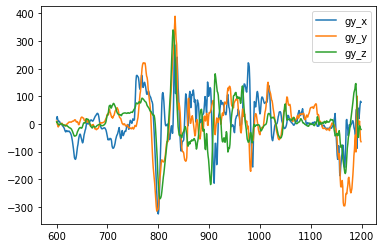

In [ ]:
ex.iloc[:,5:].plot()

###id가 2인 데이터 (밴드 이두컬)
이것또한 마찬가지로 주기가 보임.

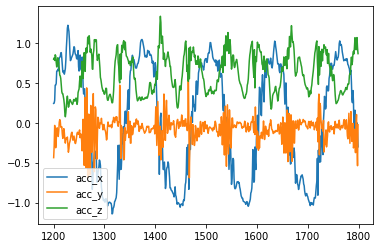

In [ ]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==2]
ex.iloc[:,2:5].plot()

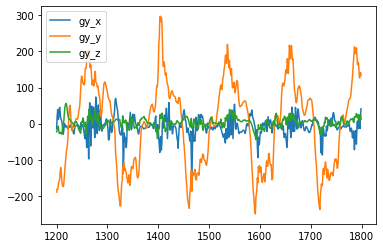

In [ ]:
ex=train[train['id']==2]
ex.iloc[:,5:].plot()

###id가 3인 데이터(운동아님)
마찬가지로 주기가 안보임

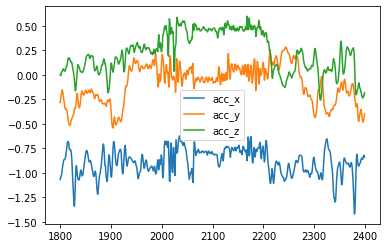

In [ ]:
ex=train[train['id']==3]
ex.iloc[:,2:5].plot()

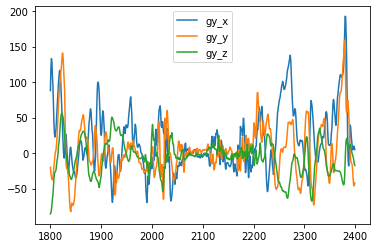

In [ ]:
ex.iloc[:,5:].plot()

In [ ]:
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [ ]:
train_labels['label_desc'].value_counts().head(60)

Non-Exercise                                                1518
Device on Table                                               97
Plank                                                         55
Wall Squat                                                    48
Jump Rope                                                     47
Two-arm Dumbbell Curl (both arms, not alternating)            37
Tap Right Device                                              37
Dip                                                           37
V-up                                                          36
Burpee                                                        35
Pushup (knee or foot variation)                               35
Squat (arms in front of body, parallel to ground)             35
Shoulder Press (dumbbell)                                     35
Lunge (alternating both legs, weight optional)                35
Overhead Triceps Extension                                    34
Sit-up (hands positioned 

In [ ]:
train_labels.loc[train_labels['label_desc']=='Walk']

,id,label,label_desc
113,113,57,Walk
279,279,57,Walk
419,419,57,Walk
421,421,57,Walk
815,815,57,Walk
990,990,57,Walk
1018,1018,57,Walk
1098,1098,57,Walk
1163,1163,57,Walk
1221,1221,57,Walk


### 걷기(id가 113) -> 확실한 주기 보임

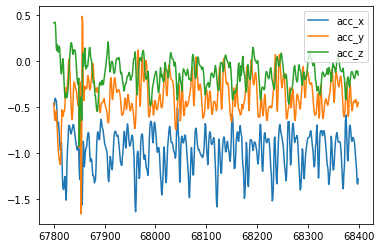

In [ ]:
ex=train[train['id']==113]
ex.iloc[:,2:5].plot()

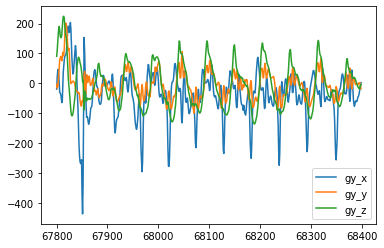

In [ ]:
ex.iloc[:,5:].plot()

In [ ]:
train_labels.loc[train_labels['label_desc']=='Squat Jump']

,id,label,label_desc
123,123,46,Squat Jump
290,290,46,Squat Jump
432,432,46,Squat Jump
513,513,46,Squat Jump
554,554,46,Squat Jump
609,609,46,Squat Jump
960,960,46,Squat Jump
1031,1031,46,Squat Jump
1266,1266,46,Squat Jump
1353,1353,46,Squat Jump


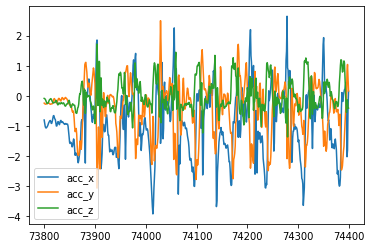

In [ ]:
ex=train[train['id']==123]
ex.iloc[:,2:5].plot()

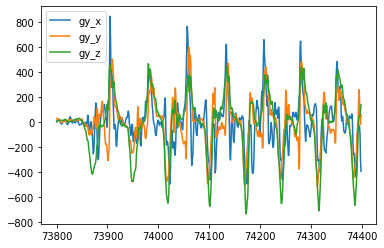

In [ ]:
ex.iloc[:,5:].plot()

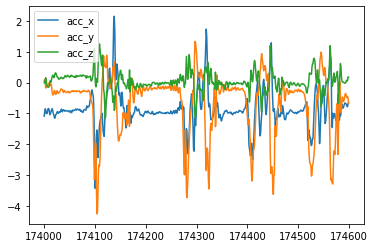

In [ ]:
ex=train[train['id']==290]
ex.iloc[:,2:5].plot()

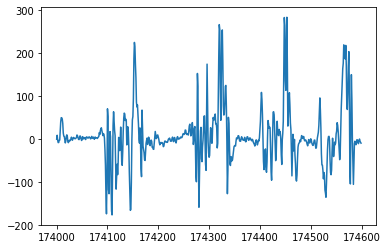

In [ ]:
ex.iloc[:,5].plot()

In [ ]:
train_labels.loc[train_labels['label_desc']=='Non-Exercise']['id']

1          1
3          3
4          4
5          5
6          6
        ... 
3114    3114
3116    3116
3120    3120
3121    3121
3123    3123
Name: id, Length: 1518, dtype: int64

In [ ]:
train_acc = train.iloc[:,0:5]
train_acc

,id,time,acc_x,acc_y,acc_z
0,0,0,1.206087,-0.179371,-0.148447
1,0,1,1.287696,-0.198974,-0.182444
2,0,2,1.304609,-0.195114,-0.253382
3,0,3,1.293095,-0.230366,-0.215210
4,0,4,1.300887,-0.187757,-0.222523
...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707
1874996,3124,596,-0.683037,-0.658466,0.329223
1874997,3124,597,-0.664730,-0.666625,0.364114
1874998,3124,598,-0.630534,-0.682565,0.373696


In [ ]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [ ]:
def plot_show(idx, df):
    f, axes = plt.subplots(3, 2)
    f.tight_layout() 
    plt.subplots_adjust(bottom=-0.8)
    for i,v in enumerate(['x','y','z']):
        axes[i,0].plot(df[df['id']==idx]['acc_'+str(v)].values)
        axes[i,0].set_title('acc_'+v)
        axes[i,0].set_xlabel('time')
    for i,v in enumerate(['x','y','z']):
        axes[i,1].plot(df[df['id']==idx]['gy_'+str(v)].values)
        axes[i,1].set_title('gy_'+v)
        axes[i,1].set_xlabel('time')

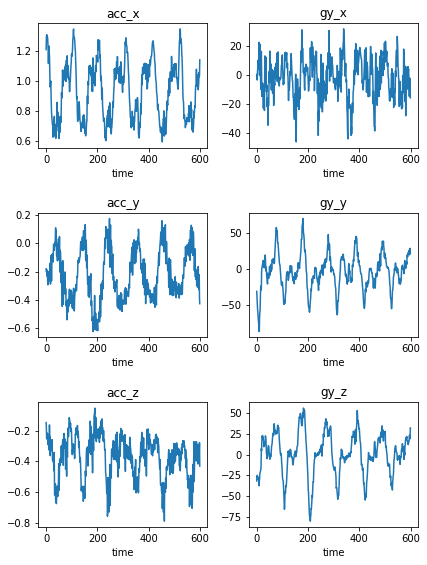

In [ ]:
plot_show(0,train)

# 라이브러리

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

# 데이터 전처리

In [ ]:
X=train.iloc[:,2:].values.reshape(3125, 600, 6, 1)
X.shape

(3125, 600, 6, 1)

In [ ]:
y = to_categorical(train_labels['label'], 61)
y.shape

(3125, 61)

# CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), input_shape = (600, 6, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(61, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 598, 4, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 596, 2, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 298, 1, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 298, 1, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 19072)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1220672   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
model.fit(X, y, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
250/250 [==============================] - 9s 6ms/step - loss: 6.5932 - accuracy: 0.3405 - val_loss: 3.0295 - val_accuracy: 0.4976
Epoch 2/30
250/250 [==============================] - 1s 4ms/step - loss: 3.2554 - accuracy: 0.4763 - val_loss: 3.1389 - val_accuracy: 0.4976
Epoch 3/30
250/250 [==============================] - 1s 4ms/step - loss: 3.1082 - accuracy: 0.4765 - val_loss: 2.7370 - val_accuracy: 0.5200
Epoch 4/30
250/250 [==============================] - 1s 3ms/step - loss: 2.8541 - accuracy: 0.5033 - val_loss: 2.5922 - val_accuracy: 0.5248
Epoch 5/30
250/250 [==============================] - 1s 4ms/step - loss: 2.5349 - accuracy: 0.5109 - val_loss: 2.5433 - val_accuracy: 0.5248
Epoch 6/30
250/250 [==============================] - 1s 4ms/step - loss: 2.4434 - accuracy: 0.5078 - val_loss: 2.4527 - val_accuracy: 0.5264
Epoch 7/30
250/250 [==============================] - 1s 4ms/step - loss: 2.2049 - accuracy: 0.5313 - val_loss: 2.3634 - val_accuracy: 0.5328
Epoch 

In [ ]:
score = model.evaluate(X, y, verbose = 0)
print('loss:', score[0])
print('accuracy:', score[1])

loss: 0.9232267141342163
accuracy: 0.8044800162315369


In [ ]:
test_X=test.iloc[:,2:].values.reshape(-1, 600, 6, 1)
test_X.shape

(782, 600, 6, 1)

In [ ]:
prediction=model.predict(test_X)

In [ ]:
prediction.shape

(782, 61)

In [ ]:
submission.iloc[:,1:]=prediction
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,8.067697e-05,2.622443e-04,5.480472e-09,1.898537e-06,1.098552e-03,2.390126e-05,1.348072e-04,1.783365e-05,1.130311e-05,1.043127e-02,1.007415e-02,1.226312e-02,3.537161e-02,1.045566e-03,1.763951e-02,4.600015e-05,1.882212e-05,9.619404e-06,5.681279e-05,1.021555e-07,1.124268e-07,1.052330e-03,1.480729e-03,5.443821e-04,6.189221e-04,3.001741e-04,0.316909,2.379712e-06,5.514861e-05,1.372243e-02,9.053078e-02,1.621775e-04,3.955135e-04,4.062206e-05,8.243367e-04,1.981079e-09,6.452407e-02,9.041815e-03,1.526847e-03,3.875463e-05,6.990639e-05,4.032152e-06,2.551038e-04,3.651764e-01,1.163895e-03,1.758103e-03,5.351261e-07,6.511062e-04,1.917124e-02,2.327997e-03,4.377885e-05,1.051341e-02,8.629561e-05,1.484160e-05,8.989041e-05,2.739123e-06,9.221300e-07,5.493809e-04,6.066013e-03,1.651207e-05,1.679989e-03
1,3126,4.318247e-07,1.144576e-06,7.995692e-13,2.284169e-08,1.289178e-06,6.061236e-06,4.764467e-09,1.143605e-05,4.347745e-10,2.612904e-09,6.956989e-09,1.447652e-10,1.171408e-14,4.785174e-10,2.382299e-10,4.942771e-07,7.462098e-08,1.893170e-08,3.870857e-08,5.997587e-12,1.755916e-08,1.010666e-07,9.296518e-07,2.392977e-06,7.158406e-07,5.093948e-06,0.999900,3.052818e-07,1.662158e-11,2.052036e-11,3.454663e-09,5.385904e-11,4.227586e-07,1.070578e-09,2.824686e-08,3.824865e-07,5.807834e-07,2.687799e-07,3.222748e-09,9.087875e-17,2.590431e-05,6.486658e-08,1.118974e-08,8.697869e-09,4.012187e-07,9.970972e-10,1.714536e-09,3.380701e-11,8.556312e-09,4.007889e-05,5.047223e-07,3.548008e-12,8.087282e-15,1.558413e-09,1.707862e-08,1.438677e-08,3.331258e-07,3.744548e-07,3.322003e-11,8.125903e-08,3.011234e-07
2,3127,8.969961e-05,2.073716e-03,1.490280e-05,1.105790e-05,3.004004e-02,4.178901e-05,4.784159e-03,4.818607e-04,2.265547e-02,1.898433e-02,2.590204e-03,2.522489e-02,3.164722e-02,1.210217e-02,3.135805e-03,1.447861e-03,8.342835e-04,3.288015e-03,6.608638e-04,7.758325e-05,2.220620e-04,5.901040e-05,1.860288e-03,1.783033e-03,1.284047e-03,1.349931e-04,0.113870,3.323187e-04,1.052164e-01,5.054050e-02,5.046005e-03,1.921487e-03,4.123566e-03,5.293610e-03,5.786349e-04,6.891499e-05,2.552322e-02,1.750499e-02,9.855400e-03,1.514836e-01,2.514176e-03,6.401196e-03,5.023970e-03,5.922584e-03,3.624241e-02,5.459201e-02,2.402211e-05,6.472930e-02,4.794599e-02,3.950452e-03,6.219227e-04,6.330895e-02,1.346296e-02,2.623915e-04,1.439568e-03,2.894107e-05,4.489955e-04,3.538207e-04,1.854508e-02,3.544184e-04,1.693869e-02
3,3128,4.258546e-06,4.660153e-06,1.646038e-11,7.085291e-08,3.364825e-06,5.504628e-06,8.372454e-07,1.727058e-04,6.678057e-07,6.294428e-07,1.367185e-04,4.128042e-07,6.646951e-10,2.349188e-06,4.484902e-05,3.185886e-06,1.122249e-06,8.849130e-07,5.497276e-07,1.297639e-10,5.143449e-08,1.723421e-05,1.192685e-04,3.749355e-04,1.060496e-04,1.119542e-06,0.996335,9.383914e-07,3.299890e-09,1.229088e-07,1.121393e-06,1.727842e-08,1.966298e-05,5.261158e-07,3.433608e-09,2.379612e-08,2.103395e-05,6.932359e-06,4.384084e-06,3.838749e-11,3.539351e-05,5.070748e-06,7.585250e-04,2.581108e-05,4.479247e-05,4.943514e-07,7.999518e-09,2.263251e-09,8.678743e-05,3.378660e-05,3.145872e-05,4.418910e-08,6.322482e-09,1.312219e-10,2.039534e-07,9.558569e-09,1.456383e-07,4.930625e-04,1.624510e-08,8.499842e-07,1.092029e-03
4,3129,2.486069e-06,7.699755e-03,2.821657e-13,5.255600e-08,2.097463e-04,1.041267e-04,8.110820e-08,9.289125e-04,3.384496e-10,9.248751e-06,1.006528e-05,9.597356e-04,4.036468e-09,1.330456e-04,4.299051e-04,2.293934e-06,1.045165e-04,8.167973e-06,8.103158e-04,3.732130e-07,1.609350e-08,4.119542e-06,2.162172e-03,1.319694e-04,6.391684e-04,1.922010e-05,0.947170,5.546890e-09,7.179670e-10,5.735679e-08,1.607810e-04,1.063552e-06,4.257258e-05,2.368849e-04,2.454808e-04,3.762700e-11,1.316196e-05,2.323714e-02,3.628805e-06,4.093934e-11,4.781947e-03,5.916172e-05,4.988634e-05,8.556189e-03,4.979060e-04,5.653771e-08,2.035808e-06,4.025691e-08,1.573684e-05

In [ ]:
submission.iloc[:,1:].max(axis = 1)

0      0.365176
1      0.999900
2      0.151484
3      0.996335
4      0.947170
         ...   
777    0.999935
778    0.999630
779    0.999941
780    0.058305
781    1.000000
Length: 782, dtype: float64

In [ ]:
submission.to_csv('submission.csv', index=False)

# CNN chanel 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D, Dropout, Flatten, MaxPooling2D, Conv1D, Input, MaxPooling1D
from keras.utils import to_categorical
from keras.layers.merge import concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model

In [ ]:
# define the model
def define_model(length):
    inputs1 = Input(shape = (length,1))
    conv1 = Conv1D(64, kernel_size=6, activation='relu')(inputs1)
    conv1_2 = Conv1D(32, kernel_size=6, activation='relu')(conv1)
    drop = Dropout(0.5)(conv1_2)
    conv1_3 = Conv1D(16, kernel_size=6, activation='relu')(drop)
    pool1 = MaxPooling1D(pool_size=2)(conv1_3)
    drop1 = Dropout(0.5)(pool1)
    flat1 = Flatten()(drop1)
	# channel 2
    inputs2 = Input(shape = (length,1))
    conv2 = Conv1D(64, kernel_size=6, activation='relu')(inputs2)
    conv2_2 = Conv1D(32, kernel_size=6, activation='relu')(conv2)
    drop = Dropout(0.5)(conv2_2)
    conv2_3 = Conv1D(16, kernel_size=6, activation='relu')(drop)
    pool2 = MaxPooling1D(pool_size=2)(conv2_3)
    drop2 = Dropout(0.5)(pool2)
    flat2 = Flatten()(drop2)
	# channel 3
    inputs3 = Input(shape = (length,1))
    conv3 = Conv1D(64, kernel_size=6, activation='relu')(inputs3)
    conv3_2 = Conv1D(32, kernel_size=6, activation='relu')(conv3)
    drop = Dropout(0.5)(conv3_2)
    conv3_3 = Conv1D(16, kernel_size=6, activation='relu')(drop)
    pool3 = MaxPooling1D(pool_size=2)(conv3_3)
    drop3 = Dropout(0.5)(pool3)
    flat3 = Flatten()(drop3)
    # channel 4
    inputs4 = Input(shape = (length,1))
    conv4 = Conv1D(64, kernel_size=6, activation='relu')(inputs4)
    conv4_2 = Conv1D(32, kernel_size=6, activation='relu')(conv4)
    drop = Dropout(0.5)(conv4_2)
    conv4_3 = Conv1D(16, kernel_size=6, activation='relu')(drop)
    pool4 = MaxPooling1D(pool_size=2)(conv4_3)
    drop4 = Dropout(0.5)(pool4)
    flat4 = Flatten()(drop4)
    # channel 5
    inputs5 = Input(shape = (length,1))
    conv5 = Conv1D(64, kernel_size=6, activation='relu')(inputs5)
    conv5_2 = Conv1D(32, kernel_size=6, activation='relu')(conv5)
    drop = Dropout(0.5)(conv5_2)
    conv5_3 = Conv1D(16, kernel_size=6, activation='relu')(drop)
    pool5 = MaxPooling1D(pool_size=2)(conv5_3)
    drop5 = Dropout(0.5)(pool5)
    flat5 = Flatten()(drop5)
    # channel 6
    inputs6 = Input(shape = (length,1))
    conv6 = Conv1D(64, kernel_size=6, activation='relu')(inputs6)
    conv6_2 = Conv1D(32, kernel_size=6, activation='relu')(conv6)
    drop = Dropout(0.5)(conv6_2)
    conv6_3 = Conv1D(16, kernel_size=6, activation='relu')(drop)
    pool6 = MaxPooling1D(pool_size=2)(conv6_3)
    drop6 = Dropout(0.5)(pool6)
    flat6 = Flatten()(drop6)
	# merge
    merged = concatenate([flat1, flat2, flat3, flat4, flat5, flat6])
	# interpretation
    
    # dense1 = Dense(128, activation='relu')(merged)
    
    drop7 = Dropout(0.5)(merged)
    outputs = Dense(61, activation='softmax')(drop7)
    model = Model(inputs=[inputs1,inputs2,inputs3,inputs4,inputs5,inputs6], outputs = outputs)
	# compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
    print(model.summary())
	# plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [ ]:
define_model(600)

Model: "model_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_205 (InputLayer)          [(None, 600, 1)]     0                                            
__________________________________________________________________________________________________
input_206 (InputLayer)          [(None, 600, 1)]     0                                            
__________________________________________________________________________________________________
input_207 (InputLayer)          [(None, 600, 1)]     0                                            
__________________________________________________________________________________________________
input_208 (InputLayer)          [(None, 600, 1)]     0                                            
___________________________________________________________________________________________

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_loss', patience = 5)

Directory = './model/'
if not os.path.exists(Directory):
    os.mkdir(Directory)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

cp = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)

In [ ]:
input1 = train.iloc[:,2].values.reshape(3125,600,1)
input2 = train.iloc[:,3].values.reshape(3125,600,1)
input3 = train.iloc[:,4].values.reshape(3125,600,1)
input4 = train.iloc[:,5].values.reshape(3125,600,1)
input5 = train.iloc[:,6].values.reshape(3125,600,1)
input6 = train.iloc[:,7].values.reshape(3125,600,1)

In [ ]:
input1.shape

(3125, 600, 1)

In [ ]:
y = to_categorical(train_labels['label'], 61)
y.shape

(3125, 61)

In [ ]:
model = define_model(600)

Model: "model_35"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_211 (InputLayer)          [(None, 600, 1)]     0                                            
__________________________________________________________________________________________________
input_212 (InputLayer)          [(None, 600, 1)]     0                                            
__________________________________________________________________________________________________
input_213 (InputLayer)          [(None, 600, 1)]     0                                            
__________________________________________________________________________________________________
input_214 (InputLayer)          [(None, 600, 1)]     0                                            
___________________________________________________________________________________________

In [ ]:
history = model.fit([input1, input2, input3, input4, input5, input6], y, epochs=30, batch_size=10, validation_split=0.2, callbacks=[es, cp])

Epoch 1/30
250/250 [==============================] - 4s 11ms/step - loss: 12.2789 - accuracy: 0.4050 - val_loss: 2.3939 - val_accuracy: 0.5392

Epoch 00001: val_loss did not improve from 1.60151
Epoch 2/30
250/250 [==============================] - 2s 9ms/step - loss: 2.0582 - accuracy: 0.5523 - val_loss: 1.9513 - val_accuracy: 0.5760

Epoch 00002: val_loss did not improve from 1.60151
Epoch 3/30
250/250 [==============================] - 2s 9ms/step - loss: 1.7142 - accuracy: 0.5680 - val_loss: 1.8118 - val_accuracy: 0.6096

Epoch 00003: val_loss did not improve from 1.60151
Epoch 4/30
250/250 [==============================] - 2s 9ms/step - loss: 1.6533 - accuracy: 0.6014 - val_loss: 1.6638 - val_accuracy: 0.6080

Epoch 00004: val_loss did not improve from 1.60151
Epoch 5/30
250/250 [==============================] - 2s 9ms/step - loss: 1.4116 - accuracy: 0.6252 - val_loss: 1.7252 - val_accuracy: 0.6256

Epoch 00005: val_loss did not improve from 1.60151
Epoch 6/30
250/250 [========

In [ ]:
y_vloss = history.history['val_loss']
y_vacc = history.history['accuracy']

No handles with labels found to put in legend.


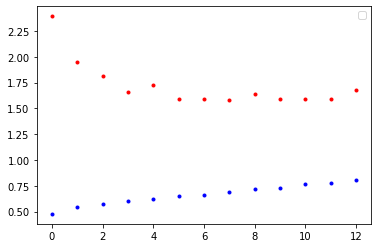

In [ ]:
import numpy as np

x_len = np.arange(len(y_vacc))
plt.plot(x_len, y_vloss, "o", c = 'red', markersize = 3)
plt.plot(x_len, y_vacc, "o", c = 'blue', markersize = 3)
plt.show()

In [ ]:
test1 = test.iloc[:,2].values.reshape(782,600,1)
test2 = test.iloc[:,3].values.reshape(782,600,1)
test3 = test.iloc[:,4].values.reshape(782,600,1)
test4 = test.iloc[:,5].values.reshape(782,600,1)
test5 = test.iloc[:,6].values.reshape(782,600,1)
test6 = test.iloc[:,7].values.reshape(782,600,1)

In [ ]:
prediction = model.predict([test1,test2,test3,test4,test5,test6])

In [ ]:
prediction.shape

(782, 61)

In [ ]:
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,2.780341e-06,7.558460e-13,1.829831e-06,1.807600e-05,7.641132e-04,8.229438e-06,1.452832e-09,6.864500e-06,9.453350e-05,3.912194e-01,2.376280e-02,9.380835e-02,5.879870e-05,7.254107e-02,7.634202e-03,1.242285e-04,1.352785e-08,7.970100e-10,4.649501e-07,1.005889e-04,9.550628e-03,1.293604e-04,1.433937e-03,1.842125e-03,2.744748e-03,1.056203e-05,0.015164,8.021800e-10,1.139642e-07,8.952337e-12,2.440808e-01,1.123435e-01,8.630799e-05,1.296293e-06,6.247604e-05,0.000016,6.069622e-04,4.501539e-10,2.365542e-04,2.152194e-05,1.576165e-05,3.962007e-07,8.743298e-06,6.259802e-06,5.299048e-12,2.634875e-10,2.485918e-04,2.665345e-10,2.434454e-07,1.423217e-04,2.398031e-05,1.210304e-04,5.781266e-04,7.063231e-03,2.082070e-06,3.393790e-05,4.912222e-10,8.112887e-04,1.246580e-02,5.797647e-10,8.243132e-07
1,3126,9.076426e-03,1.385746e-06,1.047077e-04,4.508239e-03,9.139935e-04,5.756936e-04,1.070468e-06,1.454544e-03,5.251249e-03,2.723938e-03,2.457747e-04,4.550152e-04,5.698146e-06,3.088226e-04,2.534484e-04,1.345985e-03,6.928693e-05,2.549783e-06,2.662231e-05,3.841767e-05,3.288417e-03,4.492728e-03,3.140822e-04,6.952831e-04,3.091644e-04,1.037099e-04,0.900041,7.527318e-07,2.979711e-04,1.353566e-05,3.801083e-04,3.967666e-05,2.390826e-03,2.188361e-03,9.252413e-05,0.005291,3.113084e-03,7.631869e-07,6.497398e-04,6.013731e-04,6.836948e-04,3.724119e-03,1.546229e-03,2.027823e-02,1.504026e-06,2.847941e-06,4.263356e-05,5.157576e-06,1.081191e-04,5.938154e-03,1.696501e-03,8.047227e-05,6.954697e-05,6.153749e-04,3.297636e-04,1.024789e-02,4.783637e-05,2.342455e-03,8.169199e-05,9.017604e-06,4.819310e-04
2,3127,3.627185e-04,2.016000e-01,2.660314e-04,1.276921e-06,5.451107e-04,3.346794e-04,2.750613e-02,1.776074e-02,4.064213e-05,9.286389e-06,1.195769e-08,1.127383e-08,7.656999e-09,1.604847e-09,3.832978e-08,2.133620e-06,8.478380e-03,4.999123e-02,7.788360e-04,2.518290e-06,9.350954e-04,1.106530e-05,2.082069e-10,2.507788e-06,1.962382e-08,3.307407e-03,0.023040,1.385704e-02,5.896153e-05,4.691025e-05,1.226721e-07,2.988989e-08,6.968828e-08,2.300182e-03,3.939439e-06,0.029594,2.082737e-05,3.137987e-02,7.066569e-07,2.195922e-06,4.161520e-02,3.167790e-02,1.235335e-05,3.361836e-04,5.458643e-03,1.665930e-02,1.793678e-03,9.022227e-03,5.990297e-08,2.191334e-04,4.387260e-05,2.973138e-07,4.162694e-06,7.290607e-07,4.617033e-03,4.938481e-05,3.618822e-01,3.182953e-07,2.499589e-06,1.143645e-01,1.949326e-07
3,3128,6.706424e-04,6.162185e-09,1.350873e-05,7.439607e-04,3.038071e-07,6.059234e-04,1.757063e-10,1.466978e-04,1.123126e-02,7.829713e-07,4.892313e-07,1.305151e-04,7.265030e-06,7.017933e-07,2.940292e-05,1.420871e-04,1.679419e-06,6.562512e-10,6.558611e-09,4.537838e-09,2.982754e-04,8.101308e-03,4.277556e-04,2.114453e-03,9.820192e-07,1.040816e-08,0.424085,1.121220e-07,6.640668e-04,5.129668e-05,8.355940e-06,1.761530e-07,4.499521e-03,4.917821e-05,5.985182e-04,0.000105,7.433196e-04,6.512137e-10,8.597358e-06,4.148136e-06,1.053315e-07,8.204471e-06,1.256942e-02,1.120135e-02,2.468301e-08,9.756216e-06,2.352082e-08,1.264195e-07,2.879927e-01,9.581248e-02,1.047878e-04,6.975160e-04,7.209896e-06,1.251820e-06,3.904217e-05,7.705381e-04,3.846478e-07,2.852706e-05,7.380939e-07,1.939321e-09,1.352708e-01
4,3129,6.750516e-09,5.452293e-12,9.288920e-07,7.966752e-07,2.298974e-09,2.651510e-08,4.061224e-12,1.153205e-08,8.557588e-06,1.476757e-07,1.829651e-12,9.222880e-10,5.845863e-13,7.962422e-11,8.488970e-09,6.471787e-07,4.783768e-08,3.456857e-11,1.547946e-08,4.488846e-08,2.177381e-08,4.170983e-07,2.311588e-06,5.346174e-08,2.679672e-11,5.680779e-08,0.999875,1.909953e-12,5.629310e-07,1.731429e-09,1.690852e-06,1.021191e-10,2.512305e-08,1.033769e-09,1.753224e-07,0.000002,1.131094e-08,5.617966e-13,1.696748e-09,3.537745e-05,3.002029e-11,8.445045e-09,2.049331e-11,5.668956e-09,1.634886e-11,2.146610e-09,9.924337e-11,4.943189e-11,1.511193e-09,7.256765e-09,6.9353

In [ ]:
submission.iloc[:,1:]=prediction
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,4.959607e-05,1.531364e-15,4.861500e-05,0.000239,9.062685e-04,9.563202e-07,3.090445e-06,2.584285e-07,6.121997e-05,2.828415e-01,7.348131e-02,4.205824e-02,6.250284e-03,3.514015e-01,2.830270e-02,4.092558e-04,9.142479e-08,5.802718e-10,5.614477e-08,1.599477e-06,0.001382,4.248648e-04,5.750672e-03,1.384803e-02,1.713574e-02,7.645584e-06,0.009846,9.598978e-10,4.780696e-07,6.400615e-11,1.741674e-02,1.125156e-02,9.227024e-04,4.619722e-06,1.176390e-04,3.355746e-06,2.440950e-02,9.965056e-08,1.339502e-03,2.981738e-08,2.099608e-06,7.394818e-07,1.359407e-04,9.564041e-07,8.895858e-14,6.085883e-10,4.549169e-05,1.681919e-08,3.035564e-04,8.213529e-04,7.061996e-05,9.788924e-03,8.375946e-03,1.071284e-02,4.334202e-06,0.000310,1.716589e-10,3.855059e-04,7.907790e-02,1.076721e-10,4.714624e-05
1,3126,2.148974e-02,1.253473e-08,4.443372e-08,0.002091,5.933385e-05,2.850348e-04,9.134980e-06,9.886684e-04,2.078607e-02,3.869929e-05,1.989037e-07,7.591947e-07,1.530390e-08,1.213680e-09,4.507502e-07,1.049515e-03,3.289149e-05,2.131758e-08,6.443745e-06,4.010485e-07,0.000982,2.129621e-02,1.546621e-05,6.278692e-04,6.117674e-07,2.712241e-05,0.817143,1.052535e-06,3.421947e-03,6.935156e-07,5.434299e-06,8.085691e-08,8.891591e-04,3.537588e-03,1.870075e-03,3.097614e-04,4.756006e-03,4.463638e-07,7.395814e-06,1.102818e-06,7.538369e-04,3.137561e-04,6.046004e-05,4.687094e-04,8.592046e-09,3.154823e-05,2.756416e-07,1.216887e-05,2.929543e-03,5.785782e-03,9.953584e-05,1.622175e-05,1.185081e-07,2.562429e-04,1.460466e-03,0.008332,8.792535e-06,1.739359e-06,1.705105e-07,1.208605e-07,7.773770e-02
2,3127,7.963722e-05,2.231228e-01,3.155172e-08,0.003186,1.018016e-05,1.864700e-03,5.125262e-03,3.951584e-03,4.454452e-03,3.151727e-07,4.582743e-12,1.622116e-11,8.791250e-11,2.554906e-13,4.834457e-11,1.052272e-05,5.724237e-02,3.526694e-06,6.465781e-06,4.530569e-09,0.001439,4.730338e-03,5.307145e-10,1.287511e-05,4.063421e-10,6.299453e-04,0.106881,7.341254e-02,4.434474e-05,1.415077e-04,1.877980e-12,2.877979e-11,1.429580e-04,2.566328e-03,2.642673e-05,1.019431e-03,1.235567e-04,1.256666e-03,3.300035e-07,4.176860e-10,4.807648e-02,5.263702e-04,1.103060e-04,6.375891e-06,2.148417e-05,1.419700e-01,3.493887e-06,3.078315e-02,1.112858e-03,5.631370e-04,1.436866e-07,2.870321e-07,1.948447e-09,3.595108e-09,1.248653e-01,0.000492,1.590732e-01,9.190800e-09,2.966666e-10,5.235705e-04,3.866720e-04
3,3128,1.095985e-02,2.747749e-11,2.887080e-05,0.000075,1.939980e-05,2.427445e-04,2.617178e-08,5.035171e-05,2.986410e-02,2.474899e-08,1.311998e-05,1.095580e-05,7.747029e-06,1.046936e-08,3.032463e-05,4.286192e-05,1.263915e-06,7.055864e-11,4.403490e-10,2.369540e-10,0.000013,5.744432e-03,1.075961e-03,4.292968e-04,7.734498e-05,1.642549e-09,0.494209,2.163246e-08,5.717269e-03,1.745814e-04,2.449845e-05,7.764347e-07,3.344244e-02,7.543851e-05,1.167738e-03,7.086127e-06,3.828559e-03,1.057370e-07,1.462105e-05,1.318260e-07,1.066772e-06,1.871627e-05,2.844189e-02,2.232915e-02,1.524573e-08,1.217812e-05,1.688810e-08,3.054479e-06,5.646742e-02,3.399637e-02,1.027051e-04,1.309204e-04,7.362074e-05,4.101220e-07,2.643655e-05,0.000927,1.652797e-07,4.187849e-03,1.754643e-05,8.099195e-10,2.659147e-01
4,3129,2.324342e-09,2.571000e-15,1.744801e-09,0.000004,5.403537e-09,9.797152e-06,5.335130e-08,4.445350e-11,2.025953e-08,1.045241e-08,4.381777e-11,2.783198e-11,1.990996e-13,1.857243e-13,8.614421e-11,2.548355e-08,4.903673e-10,2.646657e-09,2.920934e-07,3.288998e-08,0.000107,2.722490e-07,7.924239e-11,4.477925e-11,5.149582e-10,1.806862e-06,0.999745,5.136298e-11,1.079355e-05,1.095047e-09,9.581686e-07,5.503621e-09,4.323337e-09,3.707926e-07,6.514234e-08,9.224310e-06,1.221241e-09,6.734360e-09,1.070529e-10,4.032748e-06,1.985896e-08,9.531882e-10,5.739082e-09,6.297071e-08,1.042579e-12,5.507318e-07,5.111167e-09,1.702492e-09,4.680036e-14,8.161603e-11,2.618725e-05,9.635441e-12,1.336370e-13,3.1

In [ ]:
submission.to_csv('월간_11.csv', index=False)